In [73]:
%matplotlib inline

In [74]:
import pytpc

import numpy as np
import pandas as pd
import math
import scipy as sp

import matplotlib.pyplot as plt

In [75]:
data_path = '../../data/real/'
#runs = ['0130', '0210']

In [76]:
run_0130 = pytpc.HDFDataFile(data_path + "run_0130.h5", 'r')
run_0210 = pytpc.HDFDataFile(data_path + "run_0210.h5", 'r')

In [77]:
labels_run_0130 = pd.read_csv(data_path+'run_0130_labels.csv', sep=',')
labels_run_0210 = pd.read_csv(data_path+'run_0210_labels.csv', sep=',')

In [78]:
print(run_0130[0])

Event 0, timestamp 0.
Contains 548 traces.


In [79]:
p_indices_0130 = labels_run_0130.loc[(labels_run_0130['label'] == 'p')]['evt_id'].values
p_indices_0210 = labels_run_0210.loc[(labels_run_0210['label'] == 'p')]['evt_id'].values

In [80]:
#print(p_indices_0130)
#print(p_indices_0210)

In [57]:
for evt_id in p_indices_0130:
    print(run_0130[evt_id])

Event 12, timestamp 0.
Contains 382 traces.
Event 24, timestamp 0.
Contains 450 traces.
Event 31, timestamp 0.
Contains 350 traces.
Event 55, timestamp 0.
Contains 490 traces.
Event 60, timestamp 0.
Contains 362 traces.
Event 65, timestamp 0.
Contains 359 traces.
Event 67, timestamp 0.
Contains 429 traces.
Event 70, timestamp 0.
Contains 449 traces.
Event 72, timestamp 0.
Contains 331 traces.
Event 78, timestamp 0.
Contains 386 traces.
Event 83, timestamp 0.
Contains 730 traces.
Event 91, timestamp 0.
Contains 334 traces.
Event 96, timestamp 0.
Contains 365 traces.
Event 102, timestamp 0.
Contains 278 traces.
Event 104, timestamp 0.
Contains 655 traces.
Event 113, timestamp 0.
Contains 302 traces.
Event 141, timestamp 0.
Contains 348 traces.
Event 147, timestamp 0.
Contains 320 traces.
Event 151, timestamp 0.
Contains 453 traces.
Event 153, timestamp 0.
Contains 228 traces.
Event 157, timestamp 0.
Contains 389 traces.
Event 163, timestamp 0.
Contains 321 traces.
Event 164, timestamp 0.

Contains 304 traces.
Event 939, timestamp 0.
Contains 397 traces.
Event 945, timestamp 0.
Contains 366 traces.
Event 947, timestamp 0.
Contains 370 traces.
Event 953, timestamp 0.
Contains 389 traces.
Event 962, timestamp 0.
Contains 328 traces.
Event 965, timestamp 0.
Contains 356 traces.
Event 966, timestamp 0.
Contains 590 traces.
Event 970, timestamp 0.
Contains 319 traces.
Event 974, timestamp 0.
Contains 609 traces.
Event 976, timestamp 0.
Contains 187 traces.
Event 978, timestamp 0.
Contains 561 traces.
Event 980, timestamp 0.
Contains 209 traces.
Event 984, timestamp 0.
Contains 307 traces.
Event 989, timestamp 0.
Contains 431 traces.
Event 993, timestamp 0.
Contains 281 traces.
Event 994, timestamp 0.
Contains 341 traces.
Event 998, timestamp 0.
Contains 369 traces.
Event 1000, timestamp 0.
Contains 213 traces.
Event 1001, timestamp 0.
Contains 431 traces.


(-275, 275)

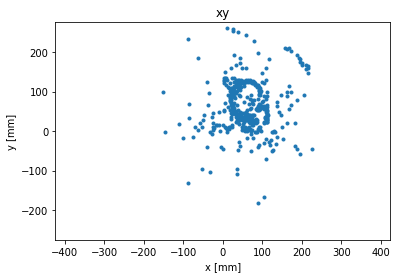

In [60]:
xyzs = run_0130[1001].xyzs(peaks_only=True, drift_vel=5.2, clock=12.5, return_pads=True, baseline_correction=True, cg_times=True)


plt.plot(xyzs[:,0], xyzs[:,1], '.')
plt.axis('equal')        
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.title('xy')
plt.xlim((-275, 275))
plt.ylim((-275, 275))

In [67]:
DETECTOR_LENGTH = 1250.0
DETECTOR_RADIUS = 275.0


x_disc = 20
y_disc = 20
z_disc = 20

x_inc = (2*DETECTOR_RADIUS)/x_disc

y_inc = (2*DETECTOR_RADIUS)/y_disc
z_inc = DETECTOR_LENGTH/z_disc

In [70]:
discElements = x_disc*y_disc*z_disc
discretized_data = np.zeros((1, discElements))
discretized_dataCHARGE = np.zeros((1, discElements))

buckets = []

discretized_xyz = np.zeros([xyzs.shape[0],xyzs.shape[1]])

num_pts = 0

for point in xyzs:
    if (point[2] > DETECTOR_LENGTH):
        print("Point outside detector.")
        continue
    
    x_bucket = math.floor(((point[0]+DETECTOR_RADIUS)/(2*DETECTOR_RADIUS))*x_disc)
    y_bucket = math.floor(((point[1]+DETECTOR_RADIUS)/(2*DETECTOR_RADIUS))*y_disc)
    z_bucket = math.floor((point[2]/DETECTOR_LENGTH)*z_disc)

    bucket_num = z_bucket*x_disc*y_disc + x_bucket + y_bucket*x_disc
    discretized_data[0,bucket_num] = 1
    discretized_dataCHARGE[0,bucket_num] += point[3]/100

    
    #sparse matrix implementation
    buckets.append(bucket_num)
    
    avg_x = -DETECTOR_RADIUS + ((2*x_bucket+1)*x_inc)/2.0
    avg_y = -DETECTOR_RADIUS + ((2*y_bucket+1)*y_inc)/2.0
    avg_z = ((2*z_bucket+1)*z_inc)/2.0                          
    
    discretized_xyz[num_pts] = [avg_x, avg_y, avg_z, point[3], point[4]]
    
    num_pts += 1

#create csr matrix where data is np.ones(len(col)) and row np.zeros(len(col)) of size (1, discElements)
cols = np.unique(buckets)
rows = np.zeros(len(cols))
data = np.ones(len(cols))
discretized_data_sparse  = sp.sparse.csr_matrix((data, (rows, cols)), shape=(1, discElements))

print("buckets filled: " + str(discretized_data.sum()))
print("charge acumulated: " + str(discretized_dataCHARGE.sum()))

Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside detector.
Point outside de

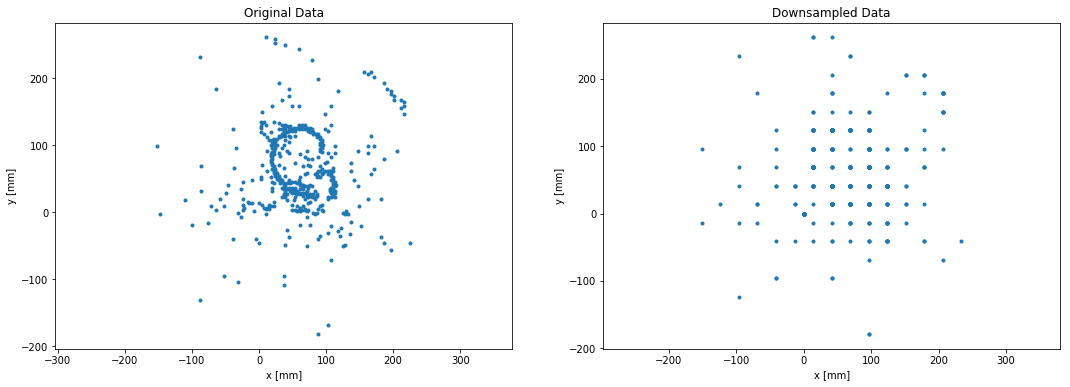

In [72]:
fig, ax = plt.subplots(1, 2, squeeze=True, figsize=(18, 6))

ax[0].plot(xyzs[:,0], xyzs[:,1], '.')
ax[0].axis('equal')
        
ax[0].set_xlabel('x [mm]')
ax[0].set_ylabel('y [mm]')
ax[0].set_title('Original Data')

#######################################################################################################################
ax[1].plot(discretized_xyz[:,0], discretized_xyz[:,1], '.')
ax[1].axis('equal')
        
ax[1].set_xlabel('x [mm]')
ax[1].set_ylabel('y [mm]')
ax[1].set_title('Downsampled Data')